In [85]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [109]:
'''
Adapted from code by Ian Osband
https://github.com/iosband/ts_tutorial/

Run experiment on extrasensory data
Policy: uniform random, posterior sampling
'''

import os
import sys

import numpy as np
import pandas as pd
import plotnine as gg

from base.experiment import BaseExperiment
from al.env_al import ContextualBanditFunctionalContext #FiniteArmedBernoulliBandit
from al.agent_al import SelectiveSampleBBQ, UniformRandom #FiniteBernoulliBanditTS
from al.env_al import normal_iid, sinewave, linear_classifier

sys.path.append(os.getcwd())

In [117]:
##############################################################################
# Running a single experiment

true_theta = [1.0, 0.5]
n_steps = 20000
seed = 0
kappa = 0.4 # 0 <= kappa <= 1
n_feat = len(true_theta)

agent = SelectiveSampleBBQ(n_feat, kappa) #UniformRandom(n_arm) #FiniteBernoulliBanditTS(n_arm)
env = ContextualBanditFunctionalContext(normal_iid, true_theta, linear_classifier)
experiment = BaseExperiment(agent, env, n_steps=n_steps,
                            seed=seed, unique_id='example')

experiment.run_experiment()

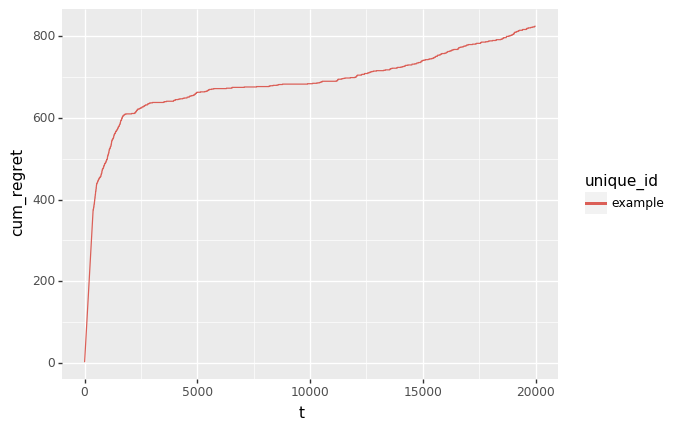

<ggplot: (7557046262)>
89 0.00445


In [118]:
##############################################################################
# Simple display / plot of results

experiment.results.head()

p = (gg.ggplot(experiment.results)
     + gg.aes(x='t', y='cum_regret', colour='unique_id')
     + gg.geom_line())
print(p)

print(env.num_query, env.num_query/n_steps)

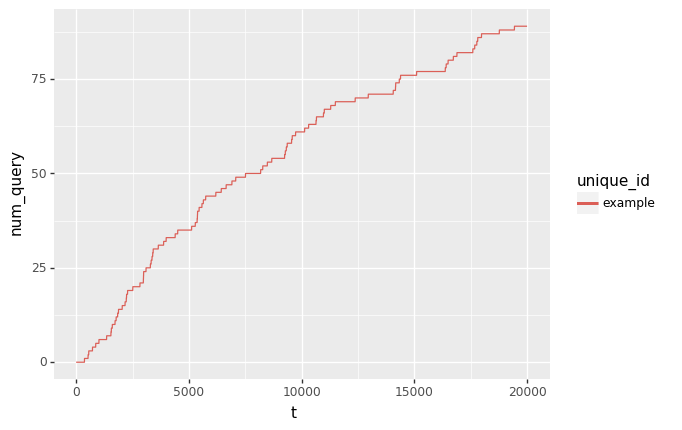

<ggplot: (-9223372029297457713)>
89 0.00445


In [119]:
##############################################################################
# Simple display / plot of results

experiment.results.head()

p = (gg.ggplot(experiment.results)
     + gg.aes(x='t', y='num_query', colour='unique_id')
     + gg.geom_line())
print(p)

print(env.num_query, env.num_query/n_steps)

In [104]:
experiment.results

,t,instant_regret,cum_regret,action,unique_id,logger
0,1,1,1,"(0, 0.0)",example,"[0.0, 0.0]"
1,2,1,2,"(0, 0.0)",example,"[0.0, 0.0]"
2,3,1,3,"(0, 0.0)",example,"[0.0, 0.0]"
3,4,1,4,"(0, 0.0)",example,"[0.0, 0.0]"
4,5,1,5,"(0, 0.0)",example,"[0.0, 0.0]"
...,...,...,...,...,...,...
9995,9996,1,2052,"(1, 1.0)",example,"[3.6305541849789824, 2.106852895184501]"
9996,9997,1,2053,"(1, 1.0)",example,"[3.626647883632492, 2.10208299073144]"
9997,9998,0,2053,"(0, -1.0)",example,"[3.6291429101568755, 2.2040351436462062]"
9998,9999,0,2053,"(0, -1.0)",example,"[3.6291429101568755, 2.2040351436462062]"


In [105]:
agent.w_t

array([3.62914291, 2.20403514])

In [56]:
a=[np.sin(2*np.pi*10*(ts-1)/1000) + np.random.normal(loc=0.0, scale=0.1) for ts in range(1000)]
a=pd.DataFrame({'x':range(1000),'y':a})
p = (gg.ggplot(a)
     + gg.aes(x='x', y='y')
     + gg.geom_line())
print(p)